In [13]:
# Load Dataset and libraries

In [14]:
! nvidia-smi -L

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


GPU 0: NVIDIA RTX A5000 (UUID: GPU-c1a48854-3148-f9e5-255b-7d40e862b2b1)


In [15]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

In [16]:
df = pd.read_csv("test_data.csv")
df['news_site'] = df['publisher'].apply(lambda x: eval(x)['title'] if isinstance(x, str) else None)
df_clean = df[['news_site', 'title']]
df_clean.head(10)

,news_site,title
0,Spectrum News NY1,How a student protest plan helped get a playgr...
1,Prism,Pro-Palestine student organizers face crackdow...
2,The Stanford Daily,A parent's perspective on Family Weekend activ...
3,The Independent Florida Alligator,"Students, staff and faculty protest DEI decisi..."
4,Mast Media,Politics of Silence: Student Protest Stops Spe...
5,WDSU New Orleans,New Orleans professor Walter Isaacson accused ...
6,NYCLU,NYCLU and Palestine Legal Sue Columbia Univers...
7,Middletown Press,Middletown High students protest unsatisfactor...
8,ABC News,Students protest DEI firings at the University...
9,Oregon Public Broadcasting,"Students walk out, demand action on Gaza from ..."


In [17]:
# Vectorize using Word2Vec

In [18]:
df_clean['processed_title'] = df_clean['title'].str.lower()
df_clean['processed_title'] = df_clean['processed_title'].str.translate(str.maketrans('', '', string.punctuation))
df_clean['processed_title'] = df_clean['processed_title'].str.split()

sentences = df_clean['processed_title'].tolist()
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

/tmp/ipykernel_1743/3013998924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['processed_title'] = df_clean['title'].str.lower()
/tmp/ipykernel_1743/3013998924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['processed_title'] = df_clean['processed_title'].str.translate(str.maketrans('', '', string.punctuation))
/tmp/ipykernel_1743/3013998924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [19]:
vectors = []
for tokens in df_clean['processed_title']:
    vectors.append(np.mean([word2vec.wv[word] for word in tokens if word in word2vec.wv] or [np.zeros(word2vec.vector_size)], axis=0))

In [20]:
headline_vectors = pd.DataFrame(vectors)
headline_vectors.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.003297,0.008889,0.003020,0.000592,0.005158,-0.008821,0.004331,0.020456,-0.007580,-0.006976,...,0.006560,0.006826,0.002275,-0.000719,0.014109,0.005287,0.003784,-0.006499,0.004584,-0.002223
1,-0.003834,0.007044,0.001060,-0.001804,0.005763,-0.003891,0.004634,0.015255,-0.004034,-0.003325,...,0.004185,0.004026,0.005444,0.001141,0.012029,0.005760,0.005635,-0.004940,0.004087,-0.003969
2,-0.001721,0.008190,0.003233,-0.002627,0.001469,-0.008475,0.005421,0.017890,-0.002929,-0.006869,...,0.006146,0.005036,0.002877,0.003405,0.011574,0.005484,-0.000279,-0.003452,0.004776,0.000399
3,-0.005969,0.010277,0.002707,-0.000336,0.006510,-0.010914,0.006891,0.024676,-0.004985,-0.005685,...,0.009159,0.003134,0.003104,-0.000641,0.019471,0.007999,0.003411,-0.010568,0.002561,-0.003064
4,-0.005595,0.013062,0.003333,-0.002183,0.005684,-0.011309,0.008792,0.025156,-0.010396,-0.008525,...,0.009012,0.006628,0.002948,-0.000096,0.019873,0.010604,0.005294,-0.010961,0.002980,-0.006133
5,-0.003489,0.006131,0.001153,-0.001077,0.003466,-0.007844,0.003433,0.016898,-0.004492,-0.004366,...,0.002454,0.002649,0.002828,-0.000741,0.012661,0.005125,0.004978,-0.006835,0.002631,-0.002343
6,-0.004428,0.006716,0.002113,-0.000430,0.007788,-0.012522,0.004945,0.021743,-0.008021,-0.008598,...,0.009372,0.004956,0.002981,0.002656,0.017967,0.005784,0.001261,-0.007084,0.002342,-0.006467
7,-0.005569,0.012607,0.002785,-0.003313,0.003741,-0.009459,0.004469,0.019836,-0.006031,-0.010463,...,0.005989,0.007002,0.002360,0.000554,0.017359,0.006083,0.006158,-0.011113,0.002819,-0.000771
8,-0.007472,0.012995,0.004043,0.001108,0.010647,-0.018001,0.009659,0.035023,-0.009278,-0.011379,...,0.011198,0.006425,0.008218,0.003448,0.027164,0.011894,0.005090,-0.013641,0.006293,-0.004472
9,-0.002009,0.007911,0.002261,-0.002804,0.006073,-0.012954,0.005598,0.020116,-0.005180,-0.006210,...,0.006447,0.002723,0.004377,0.002825,0.014309,0.005599,0.002732,-0.006944,0.003361,-0.004155


In [21]:
#Cluster

/tmp/ipykernel_1743/3553328283.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = km.labels_


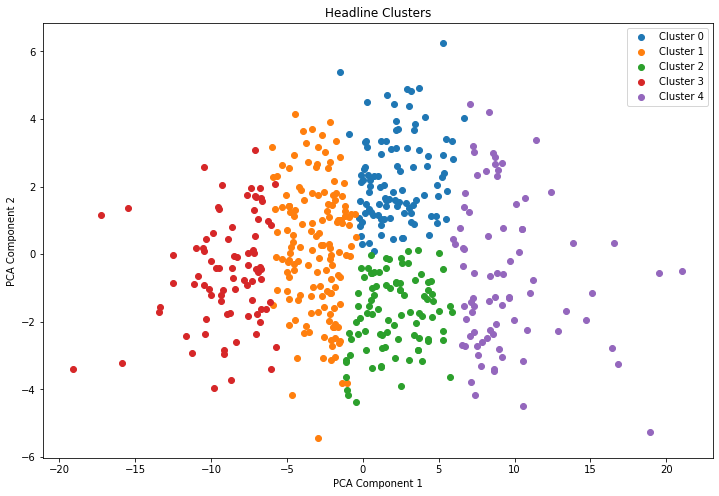

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(headline_vectors)

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X_scaled)
df_clean['cluster'] = km.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df_clean['cluster'] == cluster, 0], X_pca[df_clean['cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Headline Clusters')
plt.legend()
plt.show()

In [23]:
for cluster in sorted(df_clean['cluster'].unique()):
    print(f"\nCluster {cluster} Sample Headlines:")
    sample_headlines = df_clean[df_clean['cluster'] == cluster]['title'].sample(5, random_state=42).tolist()
    for headline in sample_headlines:
        print(f"- {headline}")


Cluster 0 Sample Headlines:
- Student demonstration in solidarity of suspended peers disbanded by administrators - Student Life
- 20 arrested after students occupy administration building at Pomona College in support of Palestinians - San Bernardino County Sun
- Berkeley professor attempts to grab mic from Palestinian student during protest - NBC News
- 20 arrested after Pomona College students protest; demonstrators then move to Claremont police station - KABC-TV
- Vancouver students walk out of class in protest of $35 million in budget cuts - KGW.com

Cluster 1 Sample Headlines:
- UT-Austin professors, students protest on campus: Live updates - Austin American-Statesman
- Mexican police kill Ayotzinapa student hours after AMLO likened protest to “dirty war” - WSWS
- President-designate Jonathan Alger welcomed in traditional AU fashion: Protest - The Eagle (American University)
- Northampton High students walk out of school, camp in mayor's office over proposed cuts to theater depart

In [24]:
# NOTE: Aside from clustering, use semantic analysis and or recluster by political leaning of news outlets.
# Will add politcal leanings to test data to see how clustering will work out.